In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import json
import re
import copy

sns.set(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
#plt = sns.lineplot(x="timepoint", y="signal",
#             hue="region", style="event",
#             data=fmri)


#plt.show()

In [2]:

#with open('../1_pop_cleaning/communes_VD_clean.json', 'r') as cf:
#    communes = json.load(cf)
#    for c in communes:
#        for hy in c["hab_year"]:
#            hy["pop"] = int(hy["pop"])
#            hy["year"] = int(hy["year"])
#cdata = pd.DataFrame(communes)
#cdata

# Loading data & assembling reviewedCommunes with non-reviewed communes

In [3]:

with open('../1_pop_cleaning/communes_V2_checkpoint_1555579436131.json', 'r') as cf:
    data = json.load(cf)
    

In [4]:

reviewedCommunes = data["reviewedCommunes"]
communesToReview = data["communesToReview"]

# remember that some are reviewed and some not
for commune in reviewedCommunes:
    commune["hand_reviewed"] = True
for commune in communesToReview:
    commune["hand_reviewed"] = False
    
print("communes[0].keys()")
print(reviewedCommunes[0].keys())
print("communesToReview[0].keys()")
print(communesToReview[0].keys())

communes[0].keys()
dict_keys(['url', 'text', 'hab_year', 'problem_time', 'problem_unit', 'problem_start', 'name', 'gravity', 'actionsDone', 'actionsUndone', 'canton', 'firstmention', 'notes', 'problems', 'warnings', 'hand_reviewed'])
communesToReview[0].keys()
dict_keys(['url', 'text', 'hab_year', 'problem_time', 'problem_unit', 'problem_start', 'name', 'gravity', 'old_hab_year', 'canton', 'firstmention', 'problems', 'warnings', 'cutoffIndex', 'tolate_hab_year', 'mismatches', 'nbErrors', 'actionsDone', 'actionsUndone', 'hand_reviewed'])


In [5]:
columns_communes = ["name","canton","url","firstmention","hab_year","raw_hab_year","notes"]
communes_name_regex = re.compile(r"\W\(?Gemeinde\)?")

communes = reviewedCommunes+communesToReview
communes = [
    {
        "name": communes_name_regex.sub("",commune["name"]),
        "canton": commune["canton"],
        "url": commune["url"],
        "firstmention": commune["firstmention"] if "firstmention" in commune else -1,
        "hab_year": [
            {
                "year": int(hy["year"]),
                "pop": int(hy["pop"]),
                "unit": hy["unit"].strip() if "unit" in hy else "undefined"
            } for hy in commune["hab_year"]
        ],
        "notes": commune["notes"] if "notes" in commune else ""
    }
    for commune in communes
]
for commune in communes:
    commune["raw_hab_year"] = copy.deepcopy(commune["hab_year"])
dfcommunes = pd.DataFrame(communes)[columns_communes]
print(dfcommunes.shape)

# Drop thurgau for now
dfcommunes = dfcommunes[dfcommunes.canton!="TG"]
print(dfcommunes.shape)

#pd.set_option('display.max_rows', None) 
dfcommunes

(2242, 7)
(2162, 7)


,name,canton,url,firstmention,hab_year,raw_hab_year,notes
27,Château-d'Œx,VD,/Articles/002593/?language=de,1080,"[{'year': 1416, 'pop': 120, 'unit': 'Haushalte...","[{'year': 1416, 'pop': 120, 'unit': 'Haushalte...","hab+foyer data!, unclear population count (wit..."
28,Lutry,VD,/Articles/002420/?language=de,908,"[{'year': 1850, 'pop': 2011, 'unit': 'Einw'}, ...","[{'year': 1850, 'pop': 2011, 'unit': 'Einw'}, ...","hab+foyer data!, with or without Savigny,"
29,Ballaigues,VD,/Articles/002528/?language=de,1228,"[{'year': 1416, 'pop': 10, 'unit': 'Haushalte'...","[{'year': 1416, 'pop': 10, 'unit': 'Haushalte'...","hab+foyer data!,"
30,Belmont-sur-Yverdon,VD,/Articles/002623/?language=de,1154,"[{'year': 1409, 'pop': 31, 'unit': 'Haushalte'...","[{'year': 1409, 'pop': 31, 'unit': 'Haushalte'...","hab+foyer data!,"
31,Borex,VD,/Articles/002498/?language=de,1135,"[{'year': 1429, 'pop': 14, 'unit': 'Feuerstätt...","[{'year': 1429, 'pop': 14, 'unit': 'Feuerstätt...","hab+foyer data!,"
32,Ependes (VD),VD,/Articles/002635/?language=de,1154,"[{'year': 1404, 'pop': 17, 'unit': 'Haushalte'...","[{'year': 1404, 'pop': 17, 'unit': 'Haushalte'...","hab+foyer data!,"
33,Lignerolle,VD,/Articles/002538/?language=de,1160,"[{'year': 1416, 'pop': 60, 'unit': 'Feuerstätt...","[{'year': 1416, 'pop': 60, 'unit': 'Feuerstätt...","hab+foyer data!,"
34,Premier,VD,/Articles/002542/?language=de,1316,"[{'year': 1396, 'pop': 15, 'unit': 'Feuerstätt...","[{'year': 1396, 'pop': 15, 'unit': 'Feuerstätt...","hab+foyer data!,"
35,Pully,VD,/Articles/002412/?language=de,994,"[{'year': 1764, 'pop': 626, 'unit': 'Einw'}, {...","[{'year': 1764, 'pop': 626, 'unit': 'Einw'}, {...","hab+foyer data!,"
36,Suchy,VD,/Articles/002650/?language=de,885,"[{'year': 1409, 'pop': 24, 'unit': 'Feuerstätt...","[{'year': 1409, 'pop': 24, 'unit': 'Feuerstätt...","hab+foyer data!,"


In [6]:
dfcommunes.iloc[0].hab_year

[{'year': 1416, 'pop': 120, 'unit': 'Haushalte'},
 {'year': 1764, 'pop': 1751, 'unit': 'Einw'},
 {'year': 1803, 'pop': 2001, 'unit': 'Einw'},
 {'year': 1850, 'pop': 2054, 'unit': 'Einw'},
 {'year': 1900, 'pop': 3025, 'unit': 'Einw'},
 {'year': 1930, 'pop': 3840, 'unit': 'Einw'},
 {'year': 1950, 'pop': 3381, 'unit': 'Einw'},
 {'year': 1980, 'pop': 2872, 'unit': 'Einw'},
 {'year': 1990, 'pop': 3110, 'unit': 'Einw'},
 {'year': 2000, 'pop': 2949, 'unit': 'Einw'},
 {'year': 1764, 'pop': 480, 'unit': 'Haushalte'}]

# Available data across time

min(years) =  1177
Number of observations per year:
(1149.999, 1200.0]       4
(1200.0, 1250.0]         4
(1250.0, 1300.0]         9
(1300.0, 1350.0]        19
(1350.0, 1400.0]        28
(1400.0, 1450.0]       108
(1450.0, 1500.0]       205
(1500.0, 1550.0]        82
(1550.0, 1600.0]       118
(1600.0, 1650.0]       211
(1650.0, 1700.0]       269
(1700.0, 1750.0]       255
(1750.0, 1800.0]      1329
(1800.0, 1850.0]      2631
(1850.0, 1900.0]         0
dtype: int64


Text(0.5, 1.0, 'Number of observations across time')

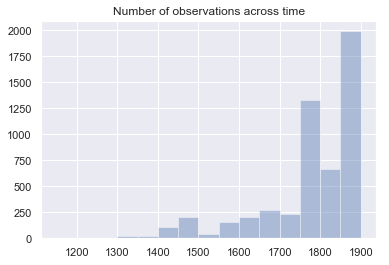

In [7]:
years_bins = range(1150,1901,50)

years = [hy["year"] for hys in dfcommunes.hab_year for hy in hys if hy["year"]<=1850]
print("min(years) = ", min(years))

print("Number of observations per year:")
print(pd.Series(years).value_counts(bins=years_bins,sort=False))

sns.distplot(years, bins=years_bins, kde=False, rug=False).set_title('Number of observations across time')

Text(0.5, 1.0, 'Number of communes with first observation before year Y')

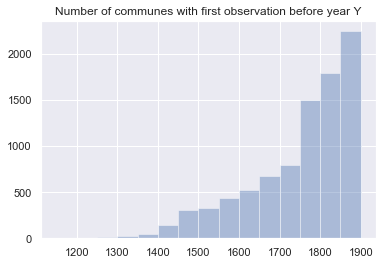

In [8]:


first_years = [min([y for hy in c["hab_year"] for y in [hy["year"]] if y<=1850]+[1850]) for c in communes ]

sns.distplot(first_years, bins=years_bins, hist_kws=dict(cumulative=True),kde=False,rug=False).set_title("Number of communes with first observation before year Y")

# Unit transformation

In [9]:
units = [hy["unit"] for hys in dfcommunes.hab_year for hy in hys if hy["year"]<1850]

print("Number of each type of units:")
print(pd.Series(units).value_counts())

Number of each type of units:
Einw                                               2815
Feuerstätten                                        157
Haushalte                                           146
Feuerstellen                                         28
Häuser                                               25
Haushaltungen                                        23
Einw Kirchgem.                                       13
Steuerpflichtige                                     11
Kanoniker                                             6
Erwachsene                                            6
Einw. Kirchgem                                        6
Einw Feuerschaukreis                                  6
Hofstätten                                            4
Herdstellen                                           3
Herdstätten                                           3
Haushalt                                              3
undefined                                             3
Kommunikanten     

In [10]:
pd.Series(units).unique()

array(['Haushalte', 'Einw', 'Feuerstätten', 'Haushaltungen', 'Häuser',
       'Kirchgenossen', 'Steuerpflichtige', 'Erwachsenen',
       'Einw Feuerschaukreis', 'Erwachsene', 'Kanoniker', 'Höfe',
       'Herdstellen', 'Hofstätten', 'Pesttote', 'Fam', 'Kommunikanten',
       'Feuerstellen', 'Einw Kirchgem.', 'Juden', 'Einw outlier',
       'Feuerstätten (mit Sermuz, heute Gem', 'Bürger',
       '(Pfarrei einschliesslich Molondin und Vuissens)', 'Haushalt',
       'Einwohner', '', 'Hofgenossen', 'Hausväter', 'Einw Pedrinate',
       'Herdstätten', 'undefined', 'Beisassen', 'Einw. Kirchgem',
       'Haushalte Kirchgem'], dtype=object)

In [11]:
unit_einw_1 = ['Beisassen',
'Bürger',
'Einw',
'Einw Feuerschaukreis',
'Einw Kirchgem.',
'Einw. Kirchgem', 'Einwohner',
'Kirchgenossen', 'Kommunikanten'
]
unit_haushalte_5 = [
'Erwachsene', 'Erwachsenen', 'Fam', 'Feuerstellen', 'Feuerstätten',
'Feuerstätten (mit Sermuz, heute Gem', 'Haushalt', 'Haushalte',
'Haushalte Kirchgem', 'Haushaltungen', 'Hausväter', 'Herdstellen',
'Herdstätten', 'Hofgenossen', 'Hofstätten', 'Häuser', 'Höfe',
'Steuerpflichtige',
]
accepted_units = unit_einw_1+unit_haushalte_5

In [12]:
for c in communes:
    to_delete = []
    #print(c["hab_year"])
    for i,hy in enumerate(c["hab_year"]):
        if hy["unit"] in accepted_units:
            if hy["unit"] in unit_haushalte_5:
                hy["original_unit"] = hy["unit"]
                hy["einw_conversion_factor"] = 5
                hy["pop"] = 5*hy["pop"]    
            hy["unit"] = "Einw"
        else:
            to_delete.append(i)
    to_delete.reverse()
    for hyi in to_delete:
        del c["hab_year"][hyi]
    
    

In [13]:
dfcommunes.iloc[43]

name                                                    Altendorf
canton                                                         SZ
url                                 /Articles/000716/?language=de
firstmention                                                  972
hab_year        [{'year': 1743, 'pop': 745, 'unit': 'Einw'}, {...
raw_hab_year    [{'year': 1743, 'pop': 745, 'unit': 'Einw'}, {...
notes                                                            
Name: 70, dtype: object

In [14]:
units = [hy["unit"] for hys in dfcommunes.hab_year for hy in hys if hy["year"]<1850]

print("Number of each type of units:")
print(pd.Series(units).value_counts())

Number of each type of units:
Einw    3265
dtype: int64


In [15]:
dfcommunes.to_csv("communes_units_converted.csv", sep=";")

In [16]:
with open('communes_units_converted.json', 'w') as json_file:
  json.dump(communes, json_file)

In [17]:
communes[0]

{'name': 'Affeltrangen',
 'canton': 'TG',
 'url': '/Articles/001945/?language=de',
 'firstmention': 779,
 'hab_year': [],
 'notes': 'daten fur beide munizipalgemeinde UND ortsgemeinde. Was ist das unterschied?',
 'raw_hab_year': [{'year': 1850, 'pop': 1505, 'unit': 'Einw Munizipalgem.'},
  {'year': 1900, 'pop': 1133, 'unit': 'Einw Munizipalgem.'},
  {'year': 1950, 'pop': 1484, 'unit': 'Einw Munizipalgem.'},
  {'year': 1990, 'pop': 1834, 'unit': 'Einw Munizipalgem.'},
  {'year': 1850, 'pop': 437, 'unit': 'Einw Ortsgem.'},
  {'year': 1900, 'pop': 406, 'unit': 'Einw Ortsgem.'},
  {'year': 1910, 'pop': 518, 'unit': 'Einw Ortsgem.'},
  {'year': 1941, 'pop': 467, 'unit': 'Einw Ortsgem.'},
  {'year': 1970, 'pop': 671, 'unit': 'Einw Ortsgem.'},
  {'year': 1990, 'pop': 773, 'unit': 'Einw Ortsgem.'}]}